<a href="https://colab.research.google.com/github/JARVIS0816/CodeAlpha_IrisFlowerClassification/blob/main/IrisFlowerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = df['species'].apply(lambda x: target_names[x])

print("First 5 rows of the dataset:")
print(df.head())
print("\nDescriptive statistics:")
print(df.describe())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Descriptive statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


class_report = classification_report(y_test, y_pred, target_names=target_names)
print("\nClassification Report:")
print(class_report)


overall_accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Model Accuracy: {overall_accuracy * 100:.2f}%")


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Overall Model Accuracy: 100.00%


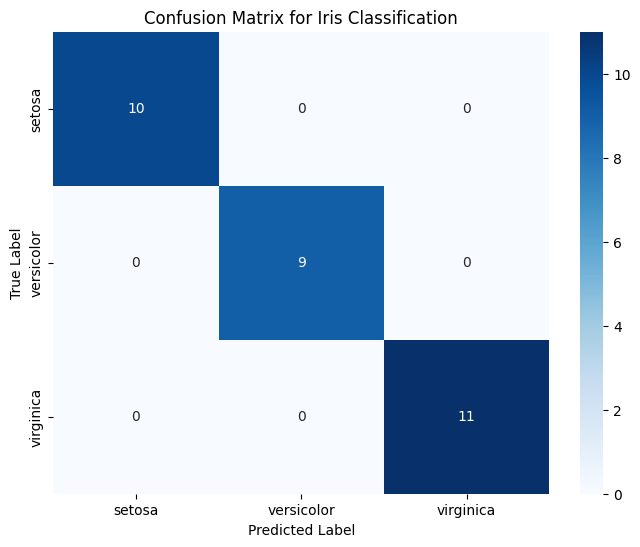

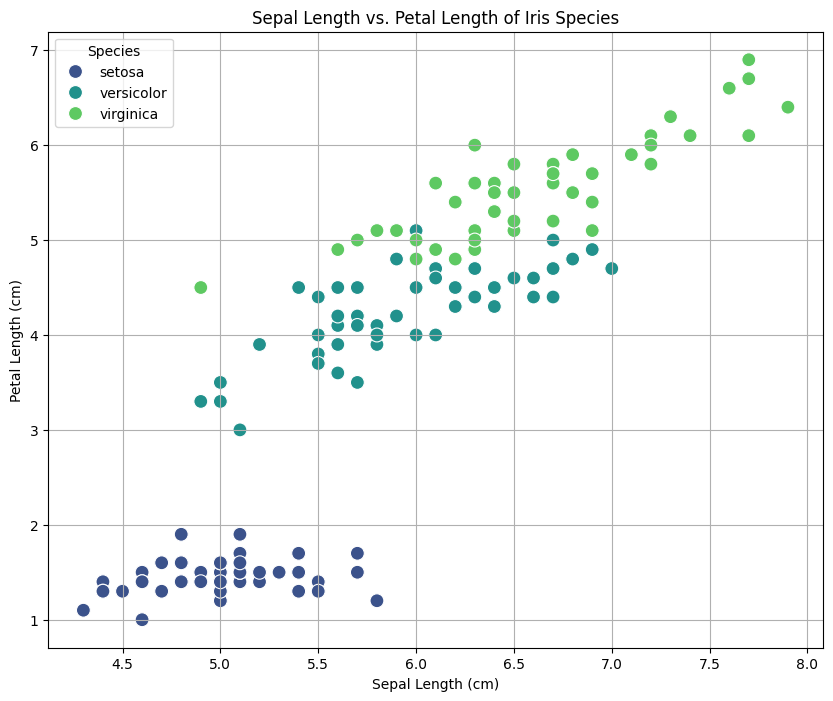

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show()


plt.figure(figsize=(10, 8))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species_name', data=df, palette='viridis', s=100)
plt.title('Sepal Length vs. Petal Length of Iris Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()